In [13]:
if(!require(dplyr)) install.packages("dplyr", repos = "http://cran.us.r-project.org")


library(dplyr)

library(tidyverse)
library(caret)
library(data.table)




Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v readr   1.3.1
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v ggplot2 3.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift


Attaching package: 'data.table'

The following object is masked from 'package:purrr':

    transpose

The following objects are masked from 'package:dplyr':

    between, first, last



In [123]:
library(wordcloud)

In [16]:
df1 <- read_csv("./2021VAERSData/2021VAERSDATA.csv")
head(df1)



Parsed with column specification:
cols(
  .default = col_character(),
  AGE_YRS = col_double(),
  CAGE_YR = col_double(),
  CAGE_MO = col_double(),
  ER_VISIT = col_logical(),
  HOSPDAYS = col_double(),
  X_STAY = col_logical(),
  NUMDAYS = col_double(),
  FORM_VERS = col_double(),
  BIRTH_DEFECT = col_logical()
)
See spec(...) for full column specifications.
Warning message:
"291 parsing failures.
 row          col           expected actual                                file
1562 BIRTH_DEFECT 1/0/T/F/TRUE/FALSE      Y './2021VAERSData/2021VAERSDATA.csv'
2867 X_STAY       1/0/T/F/TRUE/FALSE      Y './2021VAERSData/2021VAERSDATA.csv'
2937 ER_VISIT     1/0/T/F/TRUE/FALSE      Y './2021VAERSData/2021VAERSDATA.csv'
5065 ER_VISIT     1/0/T/F/TRUE/FALSE      Y './2021VAERSData/2021VAERSDATA.csv'
8251 ER_VISIT     1/0/T/F/TRUE/FALSE      Y './2021VAERSData/2021VAERSDATA.csv'
.... ............ .................. ...... ...................................
See problems(...) for more details.
"

VAERS_ID RECVDATE   STATE AGE_YRS CAGE_YR CAGE_MO SEX RPT_DATE
1 0916600  01/01/2021 TX    33      33      NA      F   NA      
2 0916601  01/01/2021 CA    73      73      NA      F   NA      
3 0916602  01/01/2021 WA    23      23      NA      F   NA      
4 0916603  01/01/2021 WA    58      58      NA      F   NA      
5 0916604  01/01/2021 TX    47      47      NA      F   NA      
6 0916605  01/01/2021 TX    40      40      NA      M   NA      
  SYMPTOM_TEXT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken                                                                                                                                                                                                                                                                                                                                                                                                                                                   
2 Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow.   2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel "much better".                                                                                
3 About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself.                                                                                                              
4 extreme fatigue, dizziness,. could not lift my left arm for 72 hours                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
5 Injection site swelling, redness, warm to the touch and itchy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
6 Adverse Events: Inflammation in the eye, confusion, headaches, inflammation in ears, cold chills, shivering, and fever like symptoms  Treatments: Primary care physician ran a series of bloodwork and found that after Flu shot I had big drop in white blood cell count and referred me to ophthalmologist and otolaryngologist  ophthalmologist  prescri

In [17]:
df2 <- read_csv("./2021VAERSData/2021VAERSSYMPTOMS.csv")
head(df2)



Parsed with column specification:
cols(
  VAERS_ID = col_character(),
  SYMPTOM1 = col_character(),
  SYMPTOMVERSION1 = col_double(),
  SYMPTOM2 = col_character(),
  SYMPTOMVERSION2 = col_double(),
  SYMPTOM3 = col_character(),
  SYMPTOMVERSION3 = col_double(),
  SYMPTOM4 = col_character(),
  SYMPTOMVERSION4 = col_double(),
  SYMPTOM5 = col_character(),
  SYMPTOMVERSION5 = col_double()
)


VAERS_ID SYMPTOM1                SYMPTOMVERSION1 SYMPTOM2               
1 0916600  Dysphagia               23.1            Epiglottitis           
2 0916601  Anxiety                 23.1            Dyspnoea               
3 0916602  Chest discomfort        23.1            Dysphagia              
4 0916603  Dizziness               23.1            Fatigue                
5 0916604  Injection site erythema 23.1            Injection site pruritus
6 0916605  Chills                  24.0            Confusional state      
  SYMPTOMVERSION2 SYMPTOM3                SYMPTOMVERSION3 SYMPTOM4             
1 23.1            NA                        NA            NA                   
2 23.1            NA                        NA            NA                   
3 23.1            Pain in extremity       23.1            Visual impairment    
4 23.1            Mobility decreased      23.1            NA                   
5 23.1            Injection site swelling 23.1            Injection site warmth
6 24.0            Eye inflammation        24.0            Headache             
  SYMPTOMVERSION4 SYMPTOM5        SYMPTOMVERSION5
1   NA            NA              NA             
2   NA            NA              NA             
3 23.1            NA              NA             
4   NA            NA              NA             
5 23.1            NA              NA             
6 24.0            Laboratory test 24

In [19]:

df3 <- read_csv("./2021VAERSData/2021VAERSVAX.csv")
head(df3)

Parsed with column specification:
cols(
  VAERS_ID = col_character(),
  VAX_TYPE = col_character(),
  VAX_MANU = col_character(),
  VAX_LOT = col_character(),
  VAX_DOSE_SERIES = col_character(),
  VAX_ROUTE = col_character(),
  VAX_SITE = col_character(),
  VAX_NAME = col_character()
)


VAERS_ID VAX_TYPE VAX_MANU         VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE
1 0916600  COVID19  MODERNA          037K20A 1               IM        LA      
2 0916601  COVID19  MODERNA          025L20A 1               IM        RA      
3 0916602  COVID19  PFIZER\\BIONTECH EL1284  1               IM        LA      
4 0916603  COVID19  MODERNA          unknown UNK             NA        NA      
5 0916604  COVID19  MODERNA          NA      1               IM        LA      
6 0916605  FLUC4    SEQIRUS, INC.    276563  1               SYR       LA      
  VAX_NAME                                     
1 COVID19 (COVID19 (MODERNA))                  
2 COVID19 (COVID19 (MODERNA))                  
3 COVID19 (COVID19 (PFIZER-BIONTECH))          
4 COVID19 (COVID19 (MODERNA))                  
5 COVID19 (COVID19 (MODERNA))                  
6 INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT)

In [20]:
df1

VAERS_ID RECVDATE   STATE AGE_YRS CAGE_YR CAGE_MO SEX RPT_DATE
1      0916600  01/01/2021 TX    33      33      NA      F   NA      
2      0916601  01/01/2021 CA    73      73      NA      F   NA      
3      0916602  01/01/2021 WA    23      23      NA      F   NA      
4      0916603  01/01/2021 WA    58      58      NA      F   NA      
5      0916604  01/01/2021 TX    47      47      NA      F   NA      
6      0916605  01/01/2021 TX    40      40      NA      M   NA      
7      0916606  01/01/2021 NV    44      44      NA      F   NA      
8      0916607  01/01/2021 KS    50      50      NA      M   NA      
9      0916608  01/01/2021 OH    33      33      NA      M   NA      
10     0916609  01/01/2021 TN    71      71      NA      F   NA      
11     0916610  01/01/2021 VA    18      18      NA      F   NA      
12     0916611  01/01/2021 NC    33      33      NA      F   NA      
13     0916612  01/01/2021 CA    71      71      NA      F   NA      
14     0916613  01/01/2021 CA    40      40      NA      F   NA      
15     0916614  01/01/2021 NY    29      29      NA      F   NA      
16     0916615  01/01/2021 NY    38      38      NA      F   NA      
17     0916617  01/01/2021 CA    35      35      NA      F   NA      
18     0916618  01/01/2021 GA    24      24      NA      F   NA      
19     0916619  01/01/2021 NY    28      28      NA      M   NA      
20     0916620  01/01/2021 NJ    65      65      NA      M   NA      
21     0916621  01/01/2021 CA    25      25      NA      F   NA      
22     0916622  01/01/2021 NY    22      22      NA      F   NA      
23     0916623  01/01/2021 LA    31      31      NA      F   NA      
24     0916624  01/01/2021 NA    27      27      NA      F   NA      
25     0916625  01/01/2021 IL    41      41      NA      F   NA      
26     0916626  01/01/2021 NJ    63      63      NA      F   NA      
27     0916627  01/01/2021 NC    49      49      NA      F   NA      
28     0916628  01/01/2021 MD    33      33      NA      F   NA      
29     0916629  01/01/2021 NC    61      61      NA      M   NA      
30     0916630  01/01/2021 ME    56      56      NA      F   NA      
...    ...      ...        ...   ...     ...     ...     ... ...     
182530 1294760  05/07/2021 MD    37      37      NA      F   NA      
182531 1294815  05/07/2021 CA    58      NA      NA      M   NA      
182532 1294816  05/07/2021 CA    NA      NA      NA      M   NA      
182533 1294817  05/07/2021 NA    NA      NA      NA      F   NA      
182534 1294818  05/07/2021 NA    NA      NA      NA      F   NA      
182535 1294819  05/07/2021 FL    75      NA      NA      F   NA      
182536 1294820  05/07/2021 TX    35      NA      NA      F   NA      
182537 1294821  05/07/2021 NA    NA      NA      NA      F   NA      
182538 1294822  05/07/2021 TX    50      NA      NA      M   NA      
182539 1294823  05/07/2021 NA    NA      NA      NA      F   NA      
182540 1294824  05/07/2021 VA    86      NA      NA      F   NA      
182541 1294825  05/07/2021 AZ    71      NA      NA      M   NA      
182542 1294826  05/07/2021 NJ    53      NA      NA      M   NA      
182543 1294827  05/07/2021 TN    NA      NA      NA      F   NA      
182544 1294828  05/07/2021 NJ    79      NA      NA      F   NA      
182545 1294829  05/07/2021 OH    40      39      NA      F   NA      
182546 1294830  05/07/2021 IL    56      55      NA      M   NA      
182547 1294831  05/07/2021 KS    80      72      NA      F   NA      
182548 1294832  05/07/2021 PA    52      NA      NA      F   NA      
182549 1294833  05/07/2021 NY    72      NA      NA      F   NA      
182550 1294834  05/07/2021 LA    69      68      NA      M   NA      
182551 1294835  05/07/2021 AZ    31      31      NA      F   NA      
182552 1294836  05/07/2021 NA    60      NA      NA      F   NA      
182553 1294837  05/07/2021 MA    59      59      NA      F   NA      
182554 1294838  05/07/2021 IN    56      56      NA      F   NA      
182555 1294839  0

In [21]:
glimpse(df1)

Observations: 182,559
Variables: 35
$ VAERS_ID     <chr> "0916600", "0916601", "0916602", "0916603", "0916604",...
$ RECVDATE     <chr> "01/01/2021", "01/01/2021", "01/01/2021", "01/01/2021"...
$ STATE        <chr> "TX", "CA", "WA", "WA", "TX", "TX", "NV", "KS", "OH", ...
$ AGE_YRS      <dbl> 33, 73, 23, 58, 47, 40, 44, 50, 33, 71, 18, 33, 71, 40...
$ CAGE_YR      <dbl> 33, 73, 23, 58, 47, 40, 44, 50, 33, 71, 18, 33, 71, 40...
$ CAGE_MO      <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ SEX          <chr> "F", "F", "F", "F", "F", "M", "F", "M", "M", "F", "F",...
$ RPT_DATE     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ SYMPTOM_TEXT <chr> "Right side of epiglottis swelled up and hinder swallo...
$ DIED         <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ DATEDIED     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ L_THREAT     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ ER_VISIT     <

In [22]:
glimpse(df2)

Observations: 247,513
Variables: 11
$ VAERS_ID        <chr> "0916600", "0916601", "0916602", "0916603", "091660...
$ SYMPTOM1        <chr> "Dysphagia", "Anxiety", "Chest discomfort", "Dizzin...
$ SYMPTOMVERSION1 <dbl> 23.1, 23.1, 23.1, 23.1, 23.1, 24.0, 24.0, 23.1, 23....
$ SYMPTOM2        <chr> "Epiglottitis", "Dyspnoea", "Dysphagia", "Fatigue",...
$ SYMPTOMVERSION2 <dbl> 23.1, 23.1, 23.1, 23.1, 23.1, 24.0, 24.0, NA, 23.1,...
$ SYMPTOM3        <chr> NA, NA, "Pain in extremity", "Mobility decreased", ...
$ SYMPTOMVERSION3 <dbl> NA, NA, 23.1, 23.1, 23.1, 24.0, NA, NA, 23.1, NA, 2...
$ SYMPTOM4        <chr> NA, NA, "Visual impairment", NA, "Injection site wa...
$ SYMPTOMVERSION4 <dbl> NA, NA, 23.1, NA, 23.1, 24.0, NA, NA, NA, NA, NA, N...
$ SYMPTOM5        <chr> NA, NA, NA, NA, NA, "Laboratory test", NA, NA, NA, ...
$ SYMPTOMVERSION5 <dbl> NA, NA, NA, NA, NA, 24.0, NA, NA, NA, NA, NA, NA, 2...


In [23]:
glimpse(df3)

Observations: 186,242
Variables: 8
$ VAERS_ID        <chr> "0916600", "0916601", "0916602", "0916603", "091660...
$ VAX_TYPE        <chr> "COVID19", "COVID19", "COVID19", "COVID19", "COVID1...
$ VAX_MANU        <chr> "MODERNA", "MODERNA", "PFIZER\\BIONTECH", "MODERNA"...
$ VAX_LOT         <chr> "037K20A", "025L20A", "EL1284", "unknown", NA, "276...
$ VAX_DOSE_SERIES <chr> "1", "1", "1", "UNK", "1", "1", "1", "UNK", "1", "1...
$ VAX_ROUTE       <chr> "IM", "IM", "IM", NA, "IM", "SYR", "IM", "IM", "IM"...
$ VAX_SITE        <chr> "LA", "RA", "LA", NA, "LA", "LA", "LA", "LA", "LA",...
$ VAX_NAME        <chr> "COVID19 (COVID19 (MODERNA))", "COVID19 (COVID19 (M...


In [24]:
str(df1)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	182559 obs. of  35 variables:
 $ VAERS_ID    : chr  "0916600" "0916601" "0916602" "0916603" ...
 $ RECVDATE    : chr  "01/01/2021" "01/01/2021" "01/01/2021" "01/01/2021" ...
 $ STATE       : chr  "TX" "CA" "WA" "WA" ...
 $ AGE_YRS     : num  33 73 23 58 47 40 44 50 33 71 ...
 $ CAGE_YR     : num  33 73 23 58 47 40 44 50 33 71 ...
 $ CAGE_MO     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ SEX         : chr  "F" "F" "F" "F" ...
 $ RPT_DATE    : chr  NA NA NA NA ...
 $ SYMPTOM_TEXT: chr  "Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken" "Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time"| __truncated__ "About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also compl"| __truncated__ "extreme fatigue, dizziness,. could not lift my left arm for 72 hours" ...
 $ DIED        : chr  

In [25]:
str(df2)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	247513 obs. of  11 variables:
 $ VAERS_ID       : chr  "0916600" "0916601" "0916602" "0916603" ...
 $ SYMPTOM1       : chr  "Dysphagia" "Anxiety" "Chest discomfort" "Dizziness" ...
 $ SYMPTOMVERSION1: num  23.1 23.1 23.1 23.1 23.1 24 24 23.1 23.1 23.1 ...
 $ SYMPTOM2       : chr  "Epiglottitis" "Dyspnoea" "Dysphagia" "Fatigue" ...
 $ SYMPTOMVERSION2: num  23.1 23.1 23.1 23.1 23.1 24 24 NA 23.1 23.1 ...
 $ SYMPTOM3       : chr  NA NA "Pain in extremity" "Mobility decreased" ...
 $ SYMPTOMVERSION3: num  NA NA 23.1 23.1 23.1 24 NA NA 23.1 NA ...
 $ SYMPTOM4       : chr  NA NA "Visual impairment" NA ...
 $ SYMPTOMVERSION4: num  NA NA 23.1 NA 23.1 24 NA NA NA NA ...
 $ SYMPTOM5       : chr  NA NA NA NA ...
 $ SYMPTOMVERSION5: num  NA NA NA NA NA 24 NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   VAERS_ID = col_character(),
  ..   SYMPTOM1 = col_character(),
  ..   SYMPTOMVERSION1 = col_double(),
  ..   SYMPTOM2 = col_character()

In [26]:
str(df3)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	186242 obs. of  8 variables:
 $ VAERS_ID       : chr  "0916600" "0916601" "0916602" "0916603" ...
 $ VAX_TYPE       : chr  "COVID19" "COVID19" "COVID19" "COVID19" ...
 $ VAX_MANU       : chr  "MODERNA" "MODERNA" "PFIZER\\BIONTECH" "MODERNA" ...
 $ VAX_LOT        : chr  "037K20A" "025L20A" "EL1284" "unknown" ...
 $ VAX_DOSE_SERIES: chr  "1" "1" "1" "UNK" ...
 $ VAX_ROUTE      : chr  "IM" "IM" "IM" NA ...
 $ VAX_SITE       : chr  "LA" "RA" "LA" NA ...
 $ VAX_NAME       : chr  "COVID19 (COVID19 (MODERNA))" "COVID19 (COVID19 (MODERNA))" "COVID19 (COVID19 (PFIZER-BIONTECH))" "COVID19 (COVID19 (MODERNA))" ...
 - attr(*, "spec")=
  .. cols(
  ..   VAERS_ID = col_character(),
  ..   VAX_TYPE = col_character(),
  ..   VAX_MANU = col_character(),
  ..   VAX_LOT = col_character(),
  ..   VAX_DOSE_SERIES = col_character(),
  ..   VAX_ROUTE = col_character(),
  ..   VAX_SITE = col_character(),
  ..   VAX_NAME = col_character()
  .. )


In [27]:
summary(df1)

   VAERS_ID           RECVDATE            STATE              AGE_YRS      
 Length:182559      Length:182559      Length:182559      Min.   :  0.08  
 Class :character   Class :character   Class :character   1st Qu.: 37.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 51.00  
                                                          Mean   : 51.27  
                                                          3rd Qu.: 66.00  
                                                          Max.   :119.00  
                                                          NA's   :16265   
    CAGE_YR          CAGE_MO           SEX              RPT_DATE        
 Min.   :  0.00   Min.   :0.00     Length:182559      Length:182559     
 1st Qu.: 36.00   1st Qu.:0.00     Class :character   Class :character  
 Median : 50.00   Median :0.00     Mode  :character   Mode  :character  
 Mean   : 51.04   Mean   :0.06                                          
 3rd Qu.: 66.00   3rd Qu.:0.00     

In [29]:
head(df1, n=1)


VAERS_ID RECVDATE   STATE AGE_YRS CAGE_YR CAGE_MO SEX RPT_DATE
1 0916600  01/01/2021 TX    33      33      NA      F   NA      
  SYMPTOM_TEXT                                                                                   
1 Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken
  DIED ... CUR_ILL HISTORY PRIOR_VAX SPLTTYPE FORM_VERS TODAYS_DATE
1 NA   ... None    None    NA        NA       2         01/01/2021 
  BIRTH_DEFECT OFC_VISIT ER_ED_VISIT ALLERGIES        
1 NA           Y         NA          Pcn and bee venom

In [40]:
head(df2, n=1)

VAERS_ID SYMPTOM1  SYMPTOMVERSION1 SYMPTOM2     SYMPTOMVERSION2 SYMPTOM3
1 0916600  Dysphagia 23.1            Epiglottitis 23.1            NA      
  SYMPTOMVERSION3 SYMPTOM4 SYMPTOMVERSION4 SYMPTOM5 SYMPTOMVERSION5
1 NA              NA       NA              NA       NA

In [41]:
head(df3, n=1)

VAERS_ID VAX_TYPE VAX_MANU VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE
1 0916600  COVID19  MODERNA  037K20A 1               IM        LA      
  VAX_NAME                   
1 COVID19 (COVID19 (MODERNA))

In [31]:
#How many cases reported
message("Total Unique Users: ", n_distinct(df1$VAERS_ID))

Total Unique Users: 182559


In [30]:
colnames(df1)

[1] "VAERS_ID"     "RECVDATE"     "STATE"        "AGE_YRS"      "CAGE_YR"     
 [6] "CAGE_MO"      "SEX"          "RPT_DATE"     "SYMPTOM_TEXT" "DIED"        
[11] "DATEDIED"     "L_THREAT"     "ER_VISIT"     "HOSPITAL"     "HOSPDAYS"    
[16] "X_STAY"       "DISABLE"      "RECOVD"       "VAX_DATE"     "ONSET_DATE"  
[21] "NUMDAYS"      "LAB_DATA"     "V_ADMINBY"    "V_FUNDBY"     "OTHER_MEDS"  
[26] "CUR_ILL"      "HISTORY"      "PRIOR_VAX"    "SPLTTYPE"     "FORM_VERS"   
[31] "TODAYS_DATE"  "BIRTH_DEFECT" "OFC_VISIT"    "ER_ED_VISIT"  "ALLERGIES"

In [38]:
colnames(df2)

[1] "VAERS_ID"        "SYMPTOM1"        "SYMPTOMVERSION1" "SYMPTOM2"       
 [5] "SYMPTOMVERSION2" "SYMPTOM3"        "SYMPTOMVERSION3" "SYMPTOM4"       
 [9] "SYMPTOMVERSION4" "SYMPTOM5"        "SYMPTOMVERSION5"

In [39]:
colnames(df3)

[1] "VAERS_ID"        "VAX_TYPE"        "VAX_MANU"        "VAX_LOT"        
[5] "VAX_DOSE_SERIES" "VAX_ROUTE"       "VAX_SITE"        "VAX_NAME"

In [35]:
dim(df1)

[1] 182559     35

In [36]:
dim(df2)

[1] 247513     11

In [37]:
dim(df3)

[1] 186242      8

In [75]:
table(df3$VAX_TYPE)


  ADEN_4_7       ANTH       CHOL    COVID19         DT       DTAP DTAPHEPBIP 
         3          1          3     184931          2          9          9 
   DTAPIPV DTAPIPVHIB        DTP       FLU3       FLU4      FLUA3      FLUA4 
         2          5          1          8        148          8         14 
     FLUC3      FLUC4      FLUN4      FLUR4       FLUX FLUX(H1N1)        HEP 
         2         16          2         15        108          1         12 
      HEPA      HEPAB       HIBV       HPV4       HPV9       HPVX        IPV 
        14          1         11          4         16          2          2 
       MEN       MENB        MMR       MMRV        MNQ        OPV        PNC 
         1          8         20          7         13          1          1 
     PNC13        PPV        RAB        RV1        RV5        RVX         TD 
        23         39          2          2          5          1          1 
      TDAP       TTOX        TYP        UNK     VARCEL     VARZ

In [ ]:
#Filter only covid entries from all 3 datasets

In [78]:
cdf3 <- df3 %>% filter(VAX_TYPE == 'COVID19')


In [79]:
dim(cdf3)

[1] 184931      8

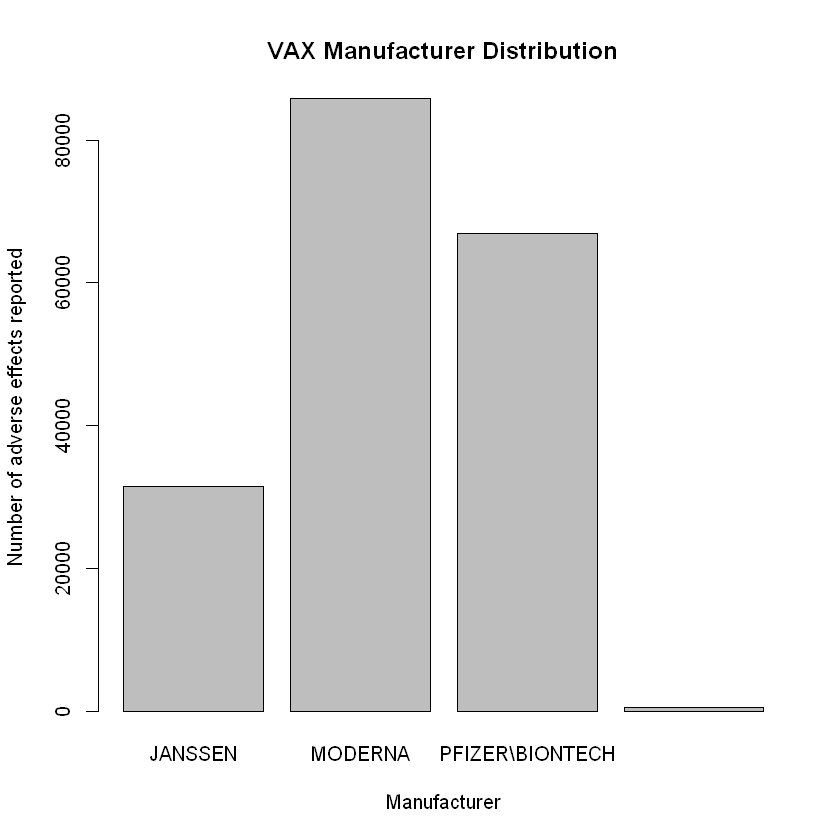

In [80]:
# Simple Bar Plot
counts <-table(cdf3$VAX_MANU)
barplot(counts, main="VAX Manufacturer Distribution",
   xlab="Manufacturer",
   ylab="Number of adverse effects reported")

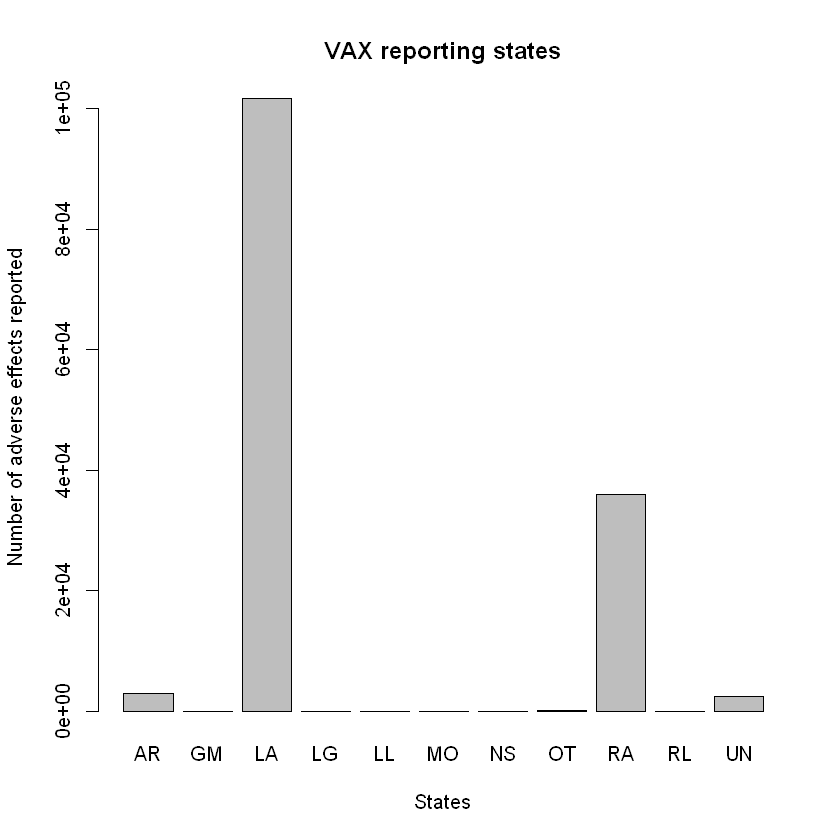

In [81]:
# Simple Bar Plot
counts <-table(cdf3$VAX_SITE)
barplot(counts, main="VAX reporting states",
   xlab="States",
   ylab="Number of adverse effects reported")

In [57]:
cdf3 %>% 
  group_by(VAX_MANU) %>%
  top_n(5,VAERS_ID)

VAERS_ID VAX_TYPE VAX_MANU             VAX_LOT  VAX_DOSE_SERIES VAX_ROUTE
1  1288630  COVID19  UNKNOWN MANUFACTURER NA       UNK             NA       
2  1288655  COVID19  UNKNOWN MANUFACTURER Unknown  UNK             NA       
3  1293966  COVID19  UNKNOWN MANUFACTURER UNK      UNK             NA       
4  1293967  COVID19  UNKNOWN MANUFACTURER UNK      1               NA       
5  1293967  COVID19  UNKNOWN MANUFACTURER UNK      2               NA       
6  1294744  COVID19  PFIZER\\BIONTECH     EL3249   1               NA       
7  1294745  COVID19  PFIZER\\BIONTECH     ER8734   2               NA       
8  1294746  COVID19  PFIZER\\BIONTECH     EN6206   2               NA       
9  1294747  COVID19  PFIZER\\BIONTECH     ER8730   2               NA       
10 1294748  COVID19  PFIZER\\BIONTECH     ER8731   1               NA       
11 1294825  COVID19  JANSSEN              042A21A  UNK             NA       
12 1294826  COVID19  JANSSEN              206A21A  UNK             NA       
13 1294827  COVID19  JANSSEN              1805020  UNK             NA       
14 1294837  COVID19  MODERNA              010N120A 1               OT       
15 1294838  COVID19  MODERNA              026A21A  2               OT       
16 1294839  COVID19  MODERNA              NA       1               OT       
17 1294840  COVID19  MODERNA              NA       2               OT       
18 1294841  COVID19  MODERNA              NA       2               OT       
19 1294843  COVID19  JANSSEN              205a21a  1               SYR      
20 1294855  COVID19  JANSSEN              204A21A  UNK             IM       
   VAX_SITE VAX_NAME                           
1  NA       COVID19 (COVID19 (UNKNOWN))        
2  NA       COVID19 (COVID19 (UNKNOWN))        
3  NA       COVID19 (COVID19 (UNKNOWN))        
4  NA       COVID19 (COVID19 (UNKNOWN))        
5  NA       COVID19 (COVID19 (UNKNOWN))        
6  NA       COVID19 (COVID19 (PFIZER-BIONTECH))
7  RA       COVID19 (COVID19 (PFIZER-BIONTECH))
8  NA       COVID19 (COVID19 (PFIZER-BIONTECH))
9  NA       COVID19 (COVID19 (PFIZER-BIONTECH))
10 NA       COVID19 (COVID19 (PFIZER-BIONTECH))
11 NA       COVID19 (COVID19 (JANSSEN))        
12 NA       COVID19 (COVID19 (JANSSEN))        
13 NA       COVID19 (COVID19 (JANSSEN))        
14 LA       COVID19 (COVID19 (MODERNA))        
15 LA       COVID19 (COVID19 (MODERNA))        
16 NA       COVID19 (COVID19 (MODERNA))        
17 NA       COVID19 (COVID19 (MODERNA))        
18 NA       COVID19 (COVID19 (MODERNA))        
19 LA       COVID19 (COVID19 (JANSSEN))        
20 LA       COVID19 (COVID19 (JANSSEN))

In [82]:
colnames(df1)

[1] "VAERS_ID"     "RECVDATE"     "STATE"        "AGE_YRS"      "CAGE_YR"     
 [6] "CAGE_MO"      "SEX"          "RPT_DATE"     "SYMPTOM_TEXT" "DIED"        
[11] "DATEDIED"     "L_THREAT"     "ER_VISIT"     "HOSPITAL"     "HOSPDAYS"    
[16] "X_STAY"       "DISABLE"      "RECOVD"       "VAX_DATE"     "ONSET_DATE"  
[21] "NUMDAYS"      "LAB_DATA"     "V_ADMINBY"    "V_FUNDBY"     "OTHER_MEDS"  
[26] "CUR_ILL"      "HISTORY"      "PRIOR_VAX"    "SPLTTYPE"     "FORM_VERS"   
[31] "TODAYS_DATE"  "BIRTH_DEFECT" "OFC_VISIT"    "ER_ED_VISIT"  "ALLERGIES"

In [83]:
dim(df1)

[1] 182559     35

In [84]:
dim(cdf3)

[1] 184931      8

In [85]:
dim(df3)

[1] 186242      8

In [86]:
dim(df2)

[1] 247513     11

In [87]:
n_distinct(df1$VAERS_ID)

[1] 182559

In [88]:
n_distinct(df2$VAERS_ID)

[1] 182558

In [89]:
n_distinct(df3$VAERS_ID)

[1] 182559

In [90]:
colnames(df1)

[1] "VAERS_ID"     "RECVDATE"     "STATE"        "AGE_YRS"      "CAGE_YR"     
 [6] "CAGE_MO"      "SEX"          "RPT_DATE"     "SYMPTOM_TEXT" "DIED"        
[11] "DATEDIED"     "L_THREAT"     "ER_VISIT"     "HOSPITAL"     "HOSPDAYS"    
[16] "X_STAY"       "DISABLE"      "RECOVD"       "VAX_DATE"     "ONSET_DATE"  
[21] "NUMDAYS"      "LAB_DATA"     "V_ADMINBY"    "V_FUNDBY"     "OTHER_MEDS"  
[26] "CUR_ILL"      "HISTORY"      "PRIOR_VAX"    "SPLTTYPE"     "FORM_VERS"   
[31] "TODAYS_DATE"  "BIRTH_DEFECT" "OFC_VISIT"    "ER_ED_VISIT"  "ALLERGIES"

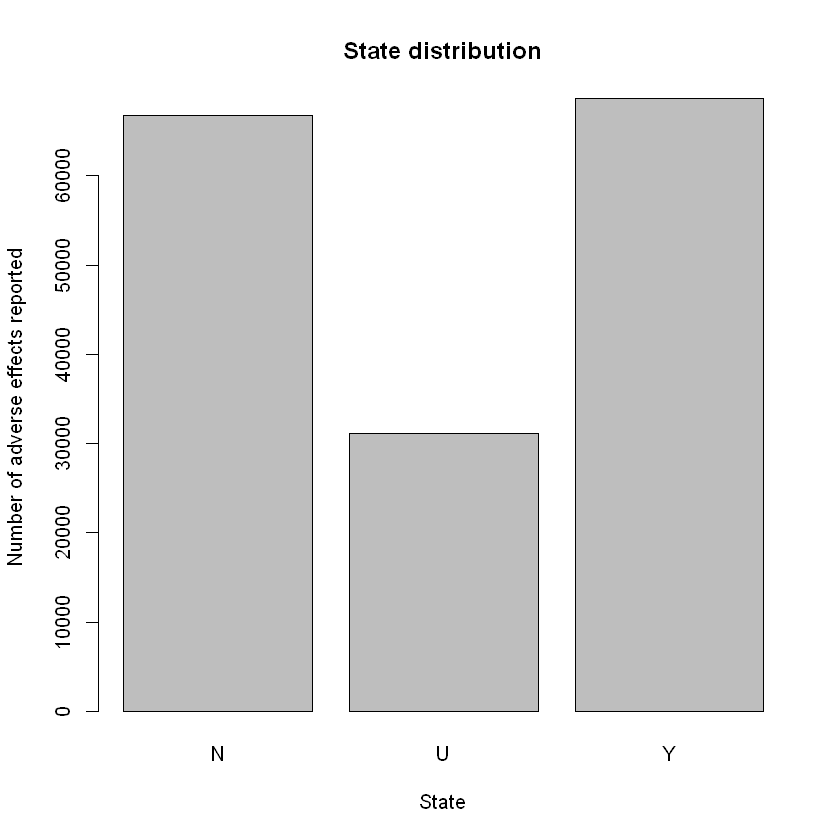

In [103]:
counts <-table(df1$RECOVD)
barplot(counts, main="State distribution",
   xlab="State",
   ylab="Number of adverse effects reported")

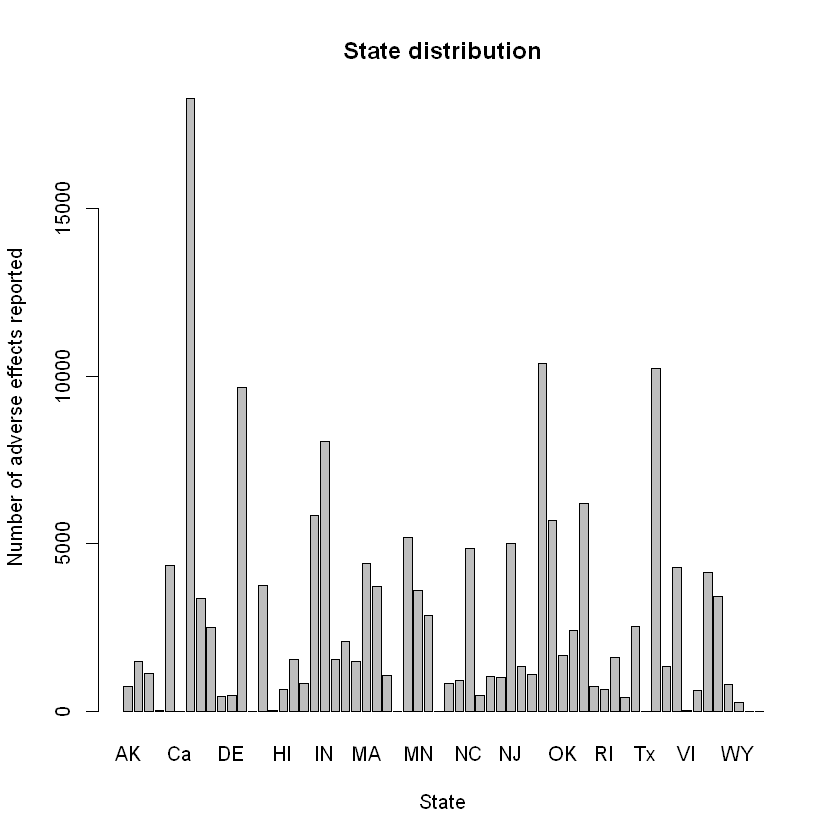

In [102]:
counts <-table(df1$STATE)
barplot(counts, main="State distribution",
   xlab="State",
   ylab="Number of adverse effects reported")

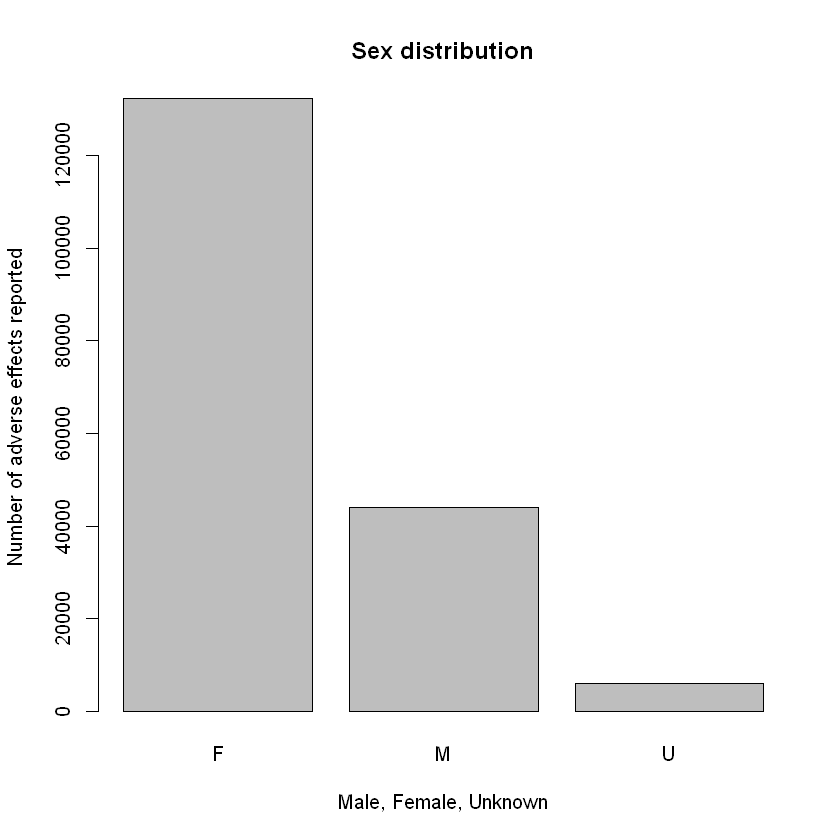

In [99]:
counts <-table(df1$SEX)
barplot(counts, main="Sex distribution",
   xlab="Male, Female, Unknown",
   ylab="Number of adverse effects reported")

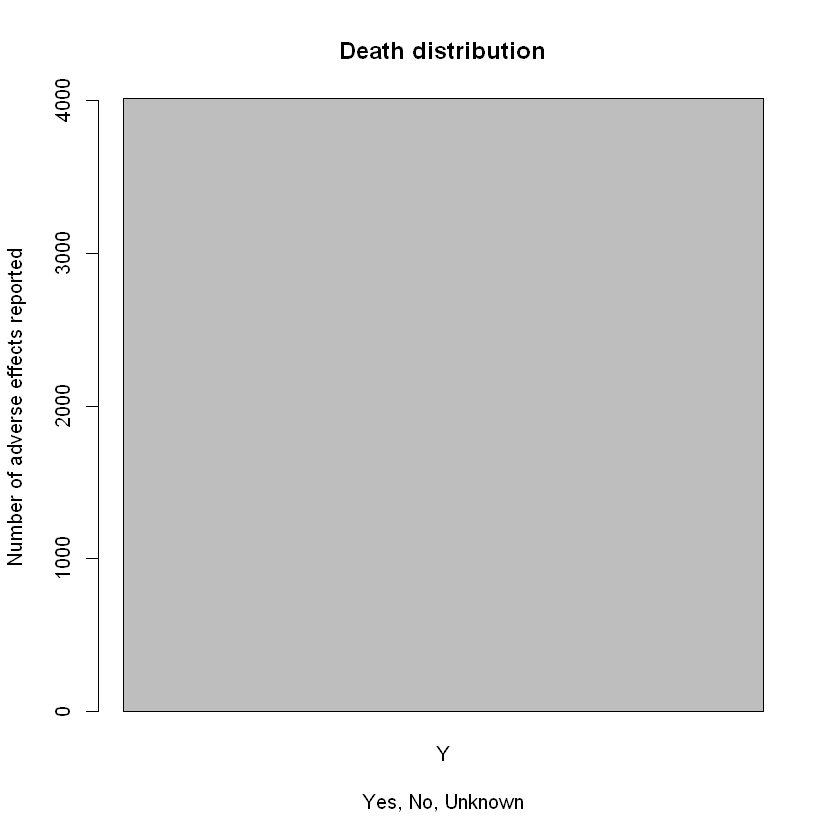

In [97]:
counts <-table(df1$DIED)
barplot(counts, main="Death distribution",
   xlab="Yes, No, Unknown",
   ylab="Number of adverse effects reported")

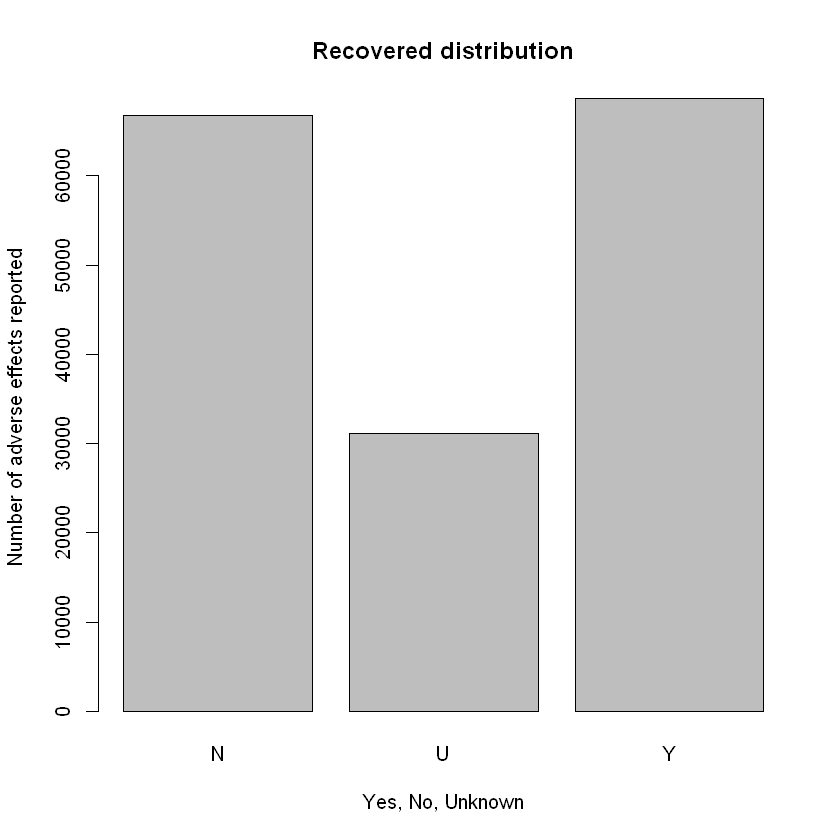

In [95]:
counts <-table(df1$RECOVD)
barplot(counts, main="Recovered distribution",
   xlab="Yes, No, Unknown",
   ylab="Number of adverse effects reported")

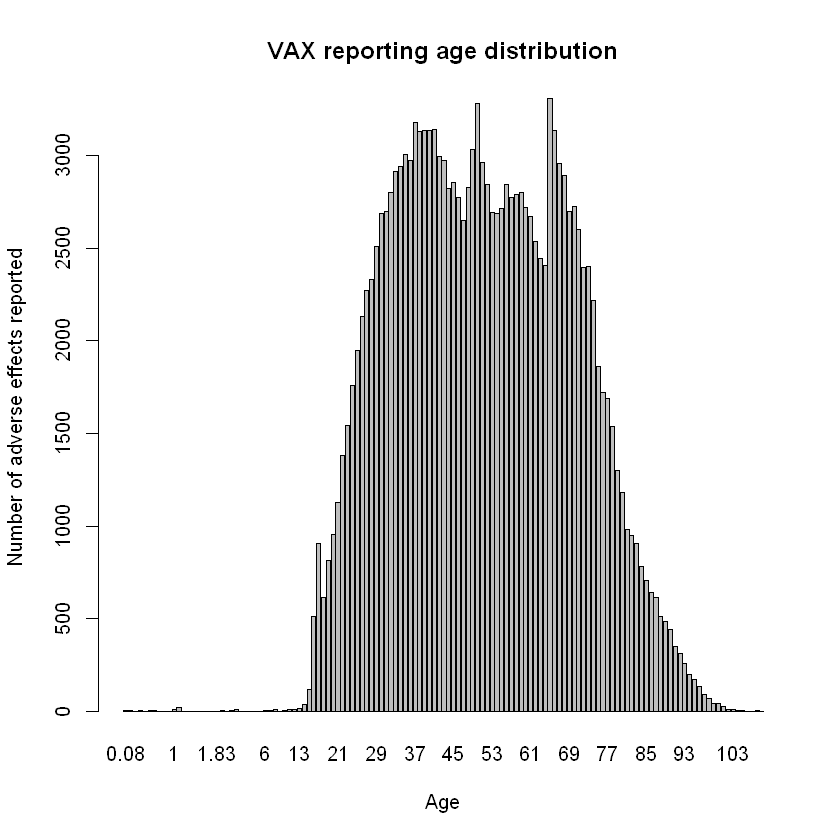

In [93]:
counts <-table(df1$AGE_YRS)
barplot(counts, main="VAX reporting age distribution",
   xlab="Age",
   ylab="Number of adverse effects reported")

In [104]:
colnames(df2)

[1] "VAERS_ID"        "SYMPTOM1"        "SYMPTOMVERSION1" "SYMPTOM2"       
 [5] "SYMPTOMVERSION2" "SYMPTOM3"        "SYMPTOMVERSION3" "SYMPTOM4"       
 [9] "SYMPTOMVERSION4" "SYMPTOM5"        "SYMPTOMVERSION5"

In [124]:
cd2 <- count(df2, SYMPTOM1)

ERROR: Error in strwidth(words[i], cex = size[i], ...): invalid 'cex' value


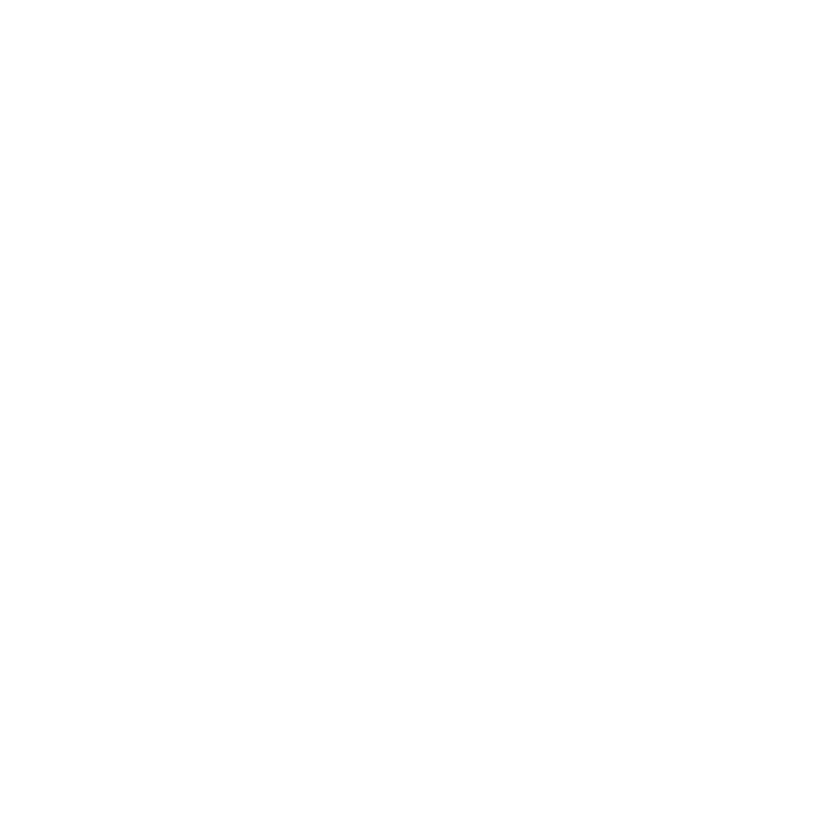

In [125]:
wordcloud(words = cd2$SYMPTOM1, freq = cd2$n, min.freq = 1)